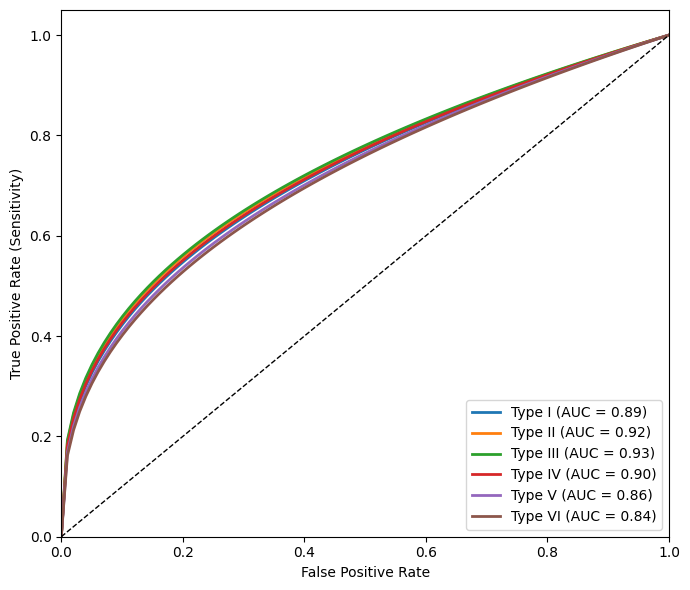

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Fitzpatrick types
fitz_types = ['Type I', 'Type II', 'Type III', 'Type IV', 'Type V', 'Type VI']
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b']

# Dummy AUC values from table
auc_values = {
    'Type I': 0.89,
    'Type II': 0.92,
    'Type III': 0.93,
    'Type IV': 0.90,
    'Type V': 0.86,
    'Type VI': 0.84
}

plt.figure(figsize=(7,6))
for i, t in enumerate(fitz_types):
    np.random.seed(i)
    fpr = np.linspace(0, 1, 100)
    base = fpr ** (1/(auc_values[t]*3))  # shape curve to match AUC
    tpr = np.clip(base, 0, 1)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{t} (AUC = {auc_values[t]:.2f})')

plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
#plt.title('ROC Curves by Fitzpatrick Skin Type (Dummy Data)')
plt.legend(loc='lower right')
plt.tight_layout()

# Save as PDF
plt.savefig("roc_fitzpatrick.pdf", format="pdf", dpi=300, bbox_inches="tight")

plt.show()


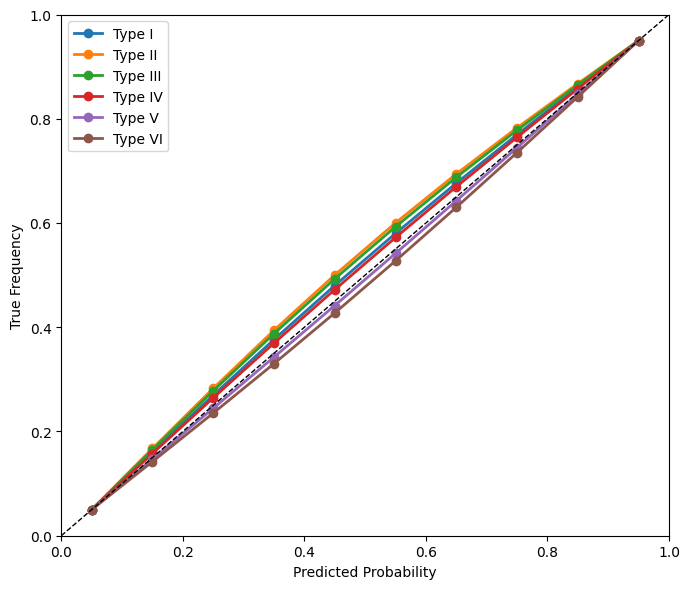

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy sensitivity values from table
sens_values = {
    'Type I': 0.861,
    'Type II': 0.902,
    'Type III': 0.887,
    'Type IV': 0.845,
    'Type V': 0.783,
    'Type VI': 0.754
}

plt.figure(figsize=(7,6))
for i, t in enumerate(fitz_types):
    np.random.seed(i+10)
    prob_pred = np.linspace(0.05, 0.95, 10)
    bias = (sens_values[t] - 0.80) * 0.5
    prob_true = np.clip(prob_pred + bias*np.sin(np.linspace(0,3.14,10)), 0, 1)
    plt.plot(prob_pred, prob_true, marker='o', lw=2, color=colors[i], label=f'{t}')

plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Predicted Probability')
plt.ylabel('True Frequency')
#plt.title('Calibration by Fitzpatrick Skin Type (Dummy Data)')
plt.legend(loc='upper left')
plt.tight_layout()

# Save as PDF
plt.savefig("calibration_fitzpatrick.pdf", format="pdf", dpi=300, bbox_inches="tight")

plt.show()


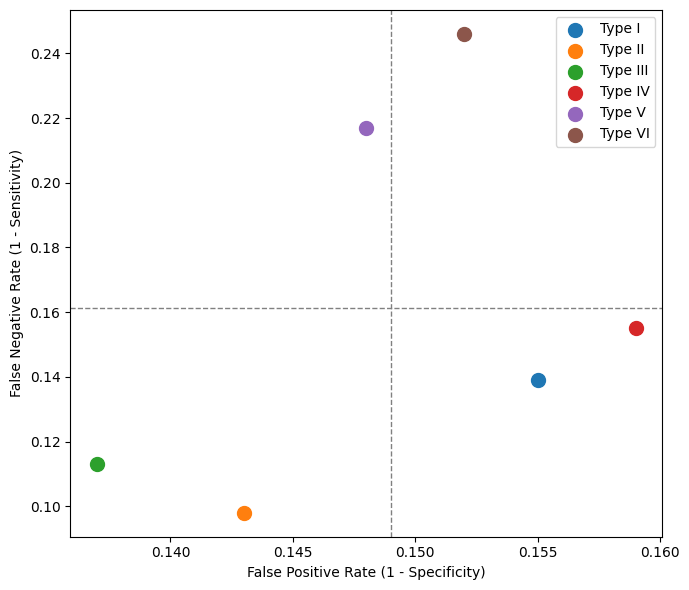

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Fitzpatrick types
fitz_types = ['Type I', 'Type II', 'Type III', 'Type IV', 'Type V', 'Type VI']
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b']

# Dummy Sensitivity and Specificity values (from your table)
sensitivity_values = {
    'Type I': 0.861,
    'Type II': 0.902,
    'Type III': 0.887,
    'Type IV': 0.845,
    'Type V': 0.783,
    'Type VI': 0.754
}
specificity_values = {
    'Type I': 0.845,
    'Type II': 0.857,
    'Type III': 0.863,
    'Type IV': 0.841,
    'Type V': 0.852,
    'Type VI': 0.848
}

# Compute FNR and FPR
fnr_values = {t: 1 - sensitivity_values[t] for t in fitz_types}
fpr_values = {t: 1 - specificity_values[t] for t in fitz_types}

# Plot Equalized Odds (FPR vs FNR)
plt.figure(figsize=(7,6))
for i, t in enumerate(fitz_types):
    plt.scatter(fpr_values[t], fnr_values[t], s=100, color=colors[i], label=t)

# Add reference lines (mean FPR and mean FNR)
plt.axhline(np.mean(list(fnr_values.values())), color='gray', linestyle='--', lw=1)
plt.axvline(np.mean(list(fpr_values.values())), color='gray', linestyle='--', lw=1)

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('False Negative Rate (1 - Sensitivity)')
#plt.title('Equalized Odds across Fitzpatrick Skin Types (Dummy Data)')
plt.legend()
plt.tight_layout()

# Save the plot as PDF
plt.savefig("equalized_odds_fitzpatrick.pdf", format="pdf", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()
